# Анализ средних цен на авокадо

Агентство, специализирующемся на изучении рынка продуктов питания поручено исследовать тренды цен на авокадо и проанализировать средние значения. 

## Описание данных

- Date — дата  
- AveragePrice — средняя цена одного авокадо  
- Total Volume — количество проданных авокадо  
- 4046 — количество проданных авокадо PLU 4046 (PLU — код товара, Product Lookup code)  
- 4225 — количество проданных авокадо PLU 4225  
- 4770 — количество проданных авокадо PLU 4770  
- Total Bags — всего упаковок  
- Small Bags — маленькие упаковки  
- Large Bags — большие  
- XLarge Bags — очень большие  
- type — обычный или органический  
- year — год  
- Region — город или регион the city or region of the observation  

В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. 

## Цели:
1. Анализ данных агенства, изучающего рвнок продуктов питания;
2. Исследовать тренды цен на авокадо;
3. Анализ средних цен на авокадо.

## Задачи:
1. Подсчёт и визуализация средних цен на авокадо по дням с разбивкой на группы;
2. Подсчёт и визуализация средних цен на авокадо по дням с разбивкой на интервалы.


#### Для каждой даты посчитаем усредненное значение средних цен на авокадо (см.колонку `AveragePrice`).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

avocado_full=pd.read_csv('avocado_full.csv', parse_dates=['Date'])
avocado_mean=avocado_full.groupby('Date').mean('AveragePrice')
avocado_mean

#### Посчитаем скользящее среднее цены авокадо, с окном равным 3. 

Посмотрим на получившиеся значения - теперь к каждой дате относится среднее значение, полученное из значений за этот и два предыдущих дня. Первые две записи содержат `NaN`
Определим максимальное значение из получившихся скользящих средних.

In [9]:
avocado_mean.rolling(3).mean()
avocado_mean_max=avocado_mean.max().round(2)

Исследуем, как размер окна влияет на сглаживание значения. 
#### Построем линейные графики и посмотрим, как изменится линия в зависимости от выбранного размера окна (2, 4, 10, 50). 

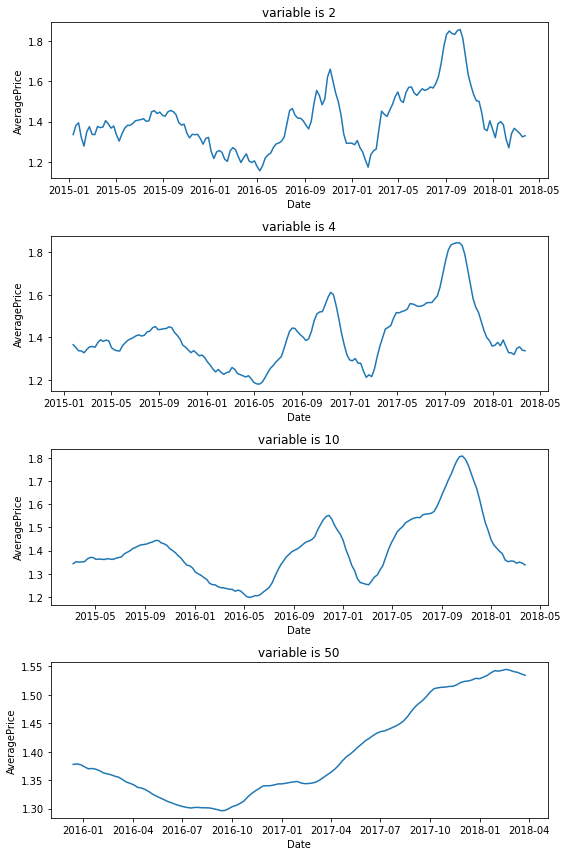

In [10]:
windows = [2, 4, 10, 50]

fig, axes = plt.subplots(4, 1, figsize=(8, 12))

for i, window in enumerate(windows):
    new_df = avocado_mean['AveragePrice'].rolling(window).mean()
    sns.lineplot(data=new_df, ax=axes[i])
    axes[i].set_title(f'variable is {window}')  
plt.tight_layout()


#### Посчитаем экспоненциальное скользящее среднее.

Посчитаем экспоненциальное скользящее среднее на основе данных из переменной `avocado_mean`.

In [11]:
ewm = avocado_mean.ewm(span = 2).mean()
ewm



,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,
2015-01-04,1.301296,7.840216e+05,306465.358704,341213.318796,21100.172593,115242.790648,91759.341667,23015.332407,468.116574,2015.000000
2015-01-11,1.353310,7.415318e+05,292061.929884,313139.648032,21588.705995,114741.565440,94835.227222,19488.777546,417.560671,2015.000000
2015-01-18,1.379480,7.306559e+05,293728.714708,299312.468177,20798.131011,116816.537699,96800.929594,19750.304181,265.303925,2015.000000
2015-01-25,1.391394,7.153774e+05,297368.912718,278083.566970,19749.260454,120175.668315,99443.533056,20498.948359,233.186900,2015.000000
2015-02-01,1.294758,9.769010e+05,410037.175444,406161.285445,29385.019840,131317.533947,104631.128593,25830.165098,856.240256,2015.000000
...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.356212,1.015663e+06,340863.290991,278814.818311,17133.249028,378836.599840,272879.441074,99253.836956,6703.321810,2017.999848
2018-03-04,1.352194,1.028955e+06,346217.335269,288249.943264,15254.648009,379216.097663,281354.122704,91318.099664,6543.875295,2017.999949
2018-03-11,1.340793,1.031042e+06,343890.922127,282054.585779,16854.550571,388232.276999,296008.803802,85678.166308,6545.306888,2017.999983


####  Для органических авокадо (см.колонку `type`) в Чикаго (см.колонку `region`) посчитаем скользящее среднее с окном 4. На основе получившихся данных построем интерактивный линейный график.

Отберём только записи о покупках органических авокадо в Чикаго и сохраним результат в переменную `organic_ch`.

In [12]:
organic_chicago=avocado_full.query('type=="organic" and region=="Chicago"').set_index('Date').rolling(4).mean().round(3)
organic_chicago
px.line(organic_chicago)

Для ещё большего обобщения информации, чем подсчет скользящих значений, можно использовать разделение значений на группы, интервалы. 
##### С помощью функции `cut()` из библиотеки `pandas` разбиваем средние цены (см.колонку `AveragePrice` в датафрейме `organic_ch` с прошлого шага с записями только об органических авокадо в Чикаго) на две группы: те, что больше общего среднего значения по всем этим ценам и те, что не больше (то есть средняя цена будет меньше или равна общему среднему). Определим, каких цен больше. Для этого:  
1) Выведим описательную статистику для колонки со средним ценами и определим минимальное, среднее и максимальное значения.  
2) Вместо минимального, возьмём значение, которое будет ниже минимального (насколько ниже — не важно).  
3) Сохраним три значения (ниже минимального, среднее и максимальное) в таком же порядке в список `bins` (это будут три границы для двух групп цен (левая граница не включается в группу, а правая включается).  
4) Запишем в список `labels` две строки с названиями групп в таком порядке: `меньше или равно среднему` и `больше среднего`.  
5) Используя подготовленные списки `bins` и `labels`, с помощью функции `pd.cut()` разбиваем значения в колонке `AveragePrice` датафрейма `organic_ch` на группы — и сохраним результат в новую колонку `AveragePrice_label` этого же датафрейма.  
6) Посчитаем, каких значений цен больше: тех, что `меньше или равно среднему`, или тех, что `больше среднего`.

In [13]:
organic_chicago.AveragePrice.describe()
min_val  = organic_chicago.AveragePrice.min().round(3)
mean_val = organic_chicago.AveragePrice.mean().round(3)
max_val  = organic_chicago.AveragePrice.max().round(3)

print(f"\nМинимальное значение: {min_val}")
print(f"Среднее значение: {mean_val}")
print(f"Максимальное значение: {max_val}")



Минимальное значение: 1.295
Среднее значение: 1.746
Максимальное значение: 2.272


In [14]:
val = [1.294, 1.746, 2.272]



In [15]:
labls=['less than or equal to average', 'more than average' ]



In [16]:
organic_chicago.AveragePrice=pd.cut(organic_chicago.AveragePrice, bins=val, labels=labls)



In [17]:
organic_chicago.AveragePrice.value_counts()


less than or equal to average    98
more than average                68
Name: AveragePrice, dtype: int64

Смотрим на результат подсчета и определяем, что `меньше или равно среднему` больше, чем `больше среднего`

## Итоги

В этом проекте мы исследовали тренды цен на авокадо и проанализировали средние значения, используя оконные функции (скользящее среднее и экспоненциальное скользящее среднее) и интерактивные графики, а также потренировались преобразовывать числовую переменную в категориальную, чтобы поделить значения на группы.

Определили:
1. Посчитали скользящее среднее цены авокадо, с окном равным 2, 3, 4 10, 50;
2. Определили для колонки со средним ценами минимальное (1.295), среднее (1.746) и максимальное значения (2.272);
3. Количество цен `меньше или равно среднему` больше, чем `больше среднего`.